In [87]:
import pandas as pd
import numpy as np
import ast
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.model_selection import train_test_split
from collections import Counter
import warnings
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler, OneHotEncoder
warnings.filterwarnings("ignore")
from sklearn.compose import ColumnTransformer
from sklearn.pipeline import Pipeline
from imblearn.over_sampling import SMOTE

In [2]:
file_path = 'yelp_dataset/yelp_academic_dataset_business.json'

business_chunks = []

# Reading the JSON file in chunks
for chunk in pd.read_json(file_path, lines=True, chunksize=10000):
    business_chunks.append(chunk)

# Concatenating all chunks into a single DataFrame
business_df_main = pd.concat(business_chunks, ignore_index=True)

In [3]:
file_path = 'yelp_dataset/yelp_academic_dataset_review.json'


review_chunks = []

# Reading the JSON file in chunks
for chunk in pd.read_json(file_path, lines=True, chunksize=10000):
    review_chunks.append(chunk) 

# Concatenating all chunks into a single DataFrame
review_df_main = pd.concat(review_chunks, ignore_index=True)

In [4]:
business_df_main.shape

(150346, 14)

In [5]:
review_df_main.shape

(6990280, 9)

# Pre-Processing Business JSON

In [6]:
business_df_main.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 150346 entries, 0 to 150345
Data columns (total 14 columns):
 #   Column        Non-Null Count   Dtype  
---  ------        --------------   -----  
 0   business_id   150346 non-null  object 
 1   name          150346 non-null  object 
 2   address       150346 non-null  object 
 3   city          150346 non-null  object 
 4   state         150346 non-null  object 
 5   postal_code   150346 non-null  object 
 6   latitude      150346 non-null  float64
 7   longitude     150346 non-null  float64
 8   stars         150346 non-null  float64
 9   review_count  150346 non-null  int64  
 10  is_open       150346 non-null  int64  
 11  attributes    136602 non-null  object 
 12  categories    150243 non-null  object 
 13  hours         127123 non-null  object 
dtypes: float64(3), int64(2), object(9)
memory usage: 16.1+ MB


In [7]:
business_df_main['attributes']

0                             {'ByAppointmentOnly': 'True'}
1                    {'BusinessAcceptsCreditCards': 'True'}
2         {'BikeParking': 'True', 'BusinessAcceptsCredit...
3         {'RestaurantsDelivery': 'False', 'OutdoorSeati...
4         {'BusinessAcceptsCreditCards': 'True', 'Wheelc...
                                ...                        
150341    {'ByAppointmentOnly': 'False', 'RestaurantsPri...
150342    {'BusinessAcceptsCreditCards': 'True', 'Restau...
150343    {'RestaurantsPriceRange2': '1', 'BusinessAccep...
150344    {'BusinessParking': '{'garage': False, 'street...
150345    {'WheelchairAccessible': 'True', 'BusinessAcce...
Name: attributes, Length: 150346, dtype: object

In [8]:
#let's convert this dictionary to features
#Creating a DataFrame with binary indicators for each attribute
attributes_df = pd.json_normalize(business_df_main['attributes'])


In [9]:
attributes_df.shape

(150346, 39)

In [10]:
business_df_main.shape

(150346, 14)

In [11]:

# Concatenate the new attributes DataFrame with the business features
business_df_main = pd.concat([business_df_main, attributes_df], axis=1)

business_df_main.shape

(150346, 53)

In [12]:
business_df_main.columns

Index(['business_id', 'name', 'address', 'city', 'state', 'postal_code',
       'latitude', 'longitude', 'stars', 'review_count', 'is_open',
       'attributes', 'categories', 'hours', 'ByAppointmentOnly',
       'BusinessAcceptsCreditCards', 'BikeParking', 'RestaurantsPriceRange2',
       'CoatCheck', 'RestaurantsTakeOut', 'RestaurantsDelivery', 'Caters',
       'WiFi', 'BusinessParking', 'WheelchairAccessible', 'HappyHour',
       'OutdoorSeating', 'HasTV', 'RestaurantsReservations', 'DogsAllowed',
       'Alcohol', 'GoodForKids', 'RestaurantsAttire', 'Ambience',
       'RestaurantsTableService', 'RestaurantsGoodForGroups', 'DriveThru',
       'NoiseLevel', 'GoodForMeal', 'BusinessAcceptsBitcoin', 'Smoking',
       'Music', 'GoodForDancing', 'AcceptsInsurance', 'BestNights', 'BYOB',
       'Corkage', 'BYOBCorkage', 'HairSpecializesIn', 'Open24Hours',
       'RestaurantsCounterService', 'AgesAllowed', 'DietaryRestrictions'],
      dtype='object')

In [13]:
duplicate_columns = business_df_main.columns[business_df_main.columns.duplicated()]

if duplicate_columns.any():
    print("Duplicate columns found:", duplicate_columns)

In [14]:
business_df_main.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 150346 entries, 0 to 150345
Data columns (total 53 columns):
 #   Column                      Non-Null Count   Dtype  
---  ------                      --------------   -----  
 0   business_id                 150346 non-null  object 
 1   name                        150346 non-null  object 
 2   address                     150346 non-null  object 
 3   city                        150346 non-null  object 
 4   state                       150346 non-null  object 
 5   postal_code                 150346 non-null  object 
 6   latitude                    150346 non-null  float64
 7   longitude                   150346 non-null  float64
 8   stars                       150346 non-null  float64
 9   review_count                150346 non-null  int64  
 10  is_open                     150346 non-null  int64  
 11  attributes                  136602 non-null  object 
 12  categories                  150243 non-null  object 
 13  hours         

In [15]:
(business_df_main.isnull().sum()*100)/business_df_main.shape[0]

business_id                    0.000000
name                           0.000000
address                        0.000000
city                           0.000000
state                          0.000000
postal_code                    0.000000
latitude                       0.000000
longitude                      0.000000
stars                          0.000000
review_count                   0.000000
is_open                        0.000000
attributes                     9.141580
categories                     0.068509
hours                         15.446370
ByAppointmentOnly             71.838958
BusinessAcceptsCreditCards    20.340415
BikeParking                   51.686111
RestaurantsPriceRange2        43.254892
CoatCheck                     96.285901
RestaurantsTakeOut            60.187168
RestaurantsDelivery           62.565017
Caters                        73.310231
WiFi                          62.144653
BusinessParking               39.416413
WheelchairAccessible          80.742421


In [16]:
#Deleting columns having null values >= 50%
threshold = 0.5 * len(business_df_main)

# Drop columns with null values >= 50%
business_df_cleaned = business_df_main.dropna(thresh=threshold, axis=1)

In [17]:
business_df_cleaned.shape #so we went from 53 columns to 17 columns

(150346, 17)

In [18]:
business_df_cleaned.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 150346 entries, 0 to 150345
Data columns (total 17 columns):
 #   Column                      Non-Null Count   Dtype  
---  ------                      --------------   -----  
 0   business_id                 150346 non-null  object 
 1   name                        150346 non-null  object 
 2   address                     150346 non-null  object 
 3   city                        150346 non-null  object 
 4   state                       150346 non-null  object 
 5   postal_code                 150346 non-null  object 
 6   latitude                    150346 non-null  float64
 7   longitude                   150346 non-null  float64
 8   stars                       150346 non-null  float64
 9   review_count                150346 non-null  int64  
 10  is_open                     150346 non-null  int64  
 11  attributes                  136602 non-null  object 
 12  categories                  150243 non-null  object 
 13  hours         

In [19]:
business_df_cleaned['categories']

0         Doctors, Traditional Chinese Medicine, Naturop...
1         Shipping Centers, Local Services, Notaries, Ma...
2         Department Stores, Shopping, Fashion, Home & G...
3         Restaurants, Food, Bubble Tea, Coffee & Tea, B...
4                                 Brewpubs, Breweries, Food
                                ...                        
150341                           Nail Salons, Beauty & Spas
150342    Pets, Nurseries & Gardening, Pet Stores, Hobby...
150343    Shopping, Jewelry, Piercing, Toy Stores, Beaut...
150344    Fitness/Exercise Equipment, Eyewear & Optician...
150345    Beauty & Spas, Permanent Makeup, Piercing, Tattoo
Name: categories, Length: 150346, dtype: object

In [20]:
#One Hot Encoding Top 10 categories
 
#Splitting the categories into separate items
business_df_cleaned['categories_split'] = business_df_cleaned['categories'].apply(lambda x: x.split(', ') if isinstance(x, str) else [])

#Getting the top 10 most common categories
all_categories = business_df_cleaned['categories_split'].explode()  # Flatten the list of categories
top_10_categories = all_categories.value_counts().head(10).index.tolist()

#One-hot encoding the top 10 categories
for category in top_10_categories:
    business_df_cleaned[category] = business_df_cleaned['categories_split'].apply(lambda x: 1 if category in x else 0)

#Dropping the temporary 'categories_split' column
business_df_cleaned = business_df_cleaned.drop(columns=['categories_split'])

business_df_cleaned.head()

,business_id,name,address,city,state,postal_code,latitude,longitude,stars,review_count,...,Restaurants,Food,Shopping,Home Services,Beauty & Spas,Nightlife,Health & Medical,Local Services,Bars,Automotive
0,Pns2l4eNsfO8kk83dixA6A,"Abby Rappoport, LAC, CMQ","1616 Chapala St, Ste 2",Santa Barbara,CA,93101,34.426679,-119.711197,5.0,7,...,0,0,0,0,0,0,1,0,0,0
1,mpf3x-BjTdTEA3yCZrAYPw,The UPS Store,87 Grasso Plaza Shopping Center,Affton,MO,63123,38.551126,-90.335695,3.0,15,...,0,0,0,0,0,0,0,1,0,0
2,tUFrWirKiKi_TAnsVWINQQ,Target,5255 E Broadway Blvd,Tucson,AZ,85711,32.223236,-110.880452,3.5,22,...,0,0,1,0,0,0,0,0,0,0
3,MTSW4McQd7CbVtyjqoe9mw,St Honore Pastries,935 Race St,Philadelphia,PA,19107,39.955505,-75.155564,4.0,80,...,1,1,0,0,0,0,0,0,0,0
4,mWMc6_wTdE0EUBKIGXDVfA,Perkiomen Valley Brewery,101 Walnut St,Green Lane,PA,18054,40.338183,-75.471659,4.5,13,...,0,1,0,0,0,0,0,0,0,0


In [21]:
business_df_cleaned.shape #17 columns to 27

(150346, 27)

In [22]:
business_df_cleaned.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 150346 entries, 0 to 150345
Data columns (total 27 columns):
 #   Column                      Non-Null Count   Dtype  
---  ------                      --------------   -----  
 0   business_id                 150346 non-null  object 
 1   name                        150346 non-null  object 
 2   address                     150346 non-null  object 
 3   city                        150346 non-null  object 
 4   state                       150346 non-null  object 
 5   postal_code                 150346 non-null  object 
 6   latitude                    150346 non-null  float64
 7   longitude                   150346 non-null  float64
 8   stars                       150346 non-null  float64
 9   review_count                150346 non-null  int64  
 10  is_open                     150346 non-null  int64  
 11  attributes                  136602 non-null  object 
 12  categories                  150243 non-null  object 
 13  hours         

In [23]:
#Dropping unnecessary columns
business_df_cleaned = business_df_cleaned.drop(columns=['name', 'address', 'attributes', 'categories', 'hours'])
business_df_cleaned.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 150346 entries, 0 to 150345
Data columns (total 22 columns):
 #   Column                      Non-Null Count   Dtype  
---  ------                      --------------   -----  
 0   business_id                 150346 non-null  object 
 1   city                        150346 non-null  object 
 2   state                       150346 non-null  object 
 3   postal_code                 150346 non-null  object 
 4   latitude                    150346 non-null  float64
 5   longitude                   150346 non-null  float64
 6   stars                       150346 non-null  float64
 7   review_count                150346 non-null  int64  
 8   is_open                     150346 non-null  int64  
 9   BusinessAcceptsCreditCards  119765 non-null  object 
 10  RestaurantsPriceRange2      85314 non-null   object 
 11  BusinessParking             91085 non-null   object 
 12  Restaurants                 150346 non-null  int64  
 13  Food          

In [24]:
business_df_cleaned.shape

(150346, 22)

In [25]:
print(business_df_cleaned.columns)

Index(['business_id', 'city', 'state', 'postal_code', 'latitude', 'longitude',
       'stars', 'review_count', 'is_open', 'BusinessAcceptsCreditCards',
       'RestaurantsPriceRange2', 'BusinessParking', 'Restaurants', 'Food',
       'Shopping', 'Home Services', 'Beauty & Spas', 'Nightlife',
       'Health & Medical', 'Local Services', 'Bars', 'Automotive'],
      dtype='object')


In [26]:
business_df_cleaned.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 150346 entries, 0 to 150345
Data columns (total 22 columns):
 #   Column                      Non-Null Count   Dtype  
---  ------                      --------------   -----  
 0   business_id                 150346 non-null  object 
 1   city                        150346 non-null  object 
 2   state                       150346 non-null  object 
 3   postal_code                 150346 non-null  object 
 4   latitude                    150346 non-null  float64
 5   longitude                   150346 non-null  float64
 6   stars                       150346 non-null  float64
 7   review_count                150346 non-null  int64  
 8   is_open                     150346 non-null  int64  
 9   BusinessAcceptsCreditCards  119765 non-null  object 
 10  RestaurantsPriceRange2      85314 non-null   object 
 11  BusinessParking             91085 non-null   object 
 12  Restaurants                 150346 non-null  int64  
 13  Food          

In [27]:
business_df_cleaned.shape

(150346, 22)

In [28]:
duplicate_columns = business_df_cleaned.columns[business_df_cleaned.columns.duplicated()]

if duplicate_columns.any():
    print("Duplicate columns found:", duplicate_columns)

In [29]:
business_df_cleaned = business_df_cleaned.dropna(subset=['BusinessParking'])

In [30]:
business_df_cleaned.shape

(91085, 22)

In [31]:
business_df_cleaned.isnull().sum()

business_id                       0
city                              0
state                             0
postal_code                       0
latitude                          0
longitude                         0
stars                             0
review_count                      0
is_open                           0
BusinessAcceptsCreditCards     8298
RestaurantsPriceRange2        13430
BusinessParking                   0
Restaurants                       0
Food                              0
Shopping                          0
Home Services                     0
Beauty & Spas                     0
Nightlife                         0
Health & Medical                  0
Local Services                    0
Bars                              0
Automotive                        0
dtype: int64

In [32]:
(business_df_cleaned['BusinessParking'] == 'None').sum()

2271

In [33]:
business_df_cleaned['BusinessParking'].head()

2    {'garage': False, 'street': False, 'validated'...
3    {'garage': False, 'street': True, 'validated':...
4    {'garage': None, 'street': None, 'validated': ...
5                                                 None
6    {'garage': False, 'street': False, 'validated'...
Name: BusinessParking, dtype: object

In [34]:
business_df_cleaned['BusinessParking'].iloc[0]

"{'garage': False, 'street': False, 'validated': False, 'lot': True, 'valet': False}"

In [35]:
business_df_cleaned['BusinessParking'] = [ast.literal_eval(item) for item in business_df_cleaned['BusinessParking']]
df_business_new1 = pd.json_normalize(business_df_cleaned['BusinessParking'])

In [36]:
type(df_business_new1)

pandas.core.frame.DataFrame

In [37]:
df_business_new1.shape

(91085, 5)

In [38]:
df_business_new1.reset_index(inplace=True,drop=True)

In [39]:
business_df_cleaned.shape

(91085, 22)

In [40]:
business_df_cleaned.reset_index(inplace=True,drop=True)

In [41]:
business_df_cleaned1 = pd.DataFrame()

In [42]:
business_df_cleaned1 = pd.concat([business_df_cleaned,df_business_new1],axis=1)
business_df_cleaned1.drop('BusinessParking',axis=1,inplace = True)

In [43]:
business_df_cleaned1

,business_id,city,state,postal_code,latitude,longitude,stars,review_count,is_open,BusinessAcceptsCreditCards,...,Nightlife,Health & Medical,Local Services,Bars,Automotive,garage,street,validated,lot,valet
0,tUFrWirKiKi_TAnsVWINQQ,Tucson,AZ,85711,32.223236,-110.880452,3.5,22,0,True,...,0,0,0,0,0,False,False,False,True,False
1,MTSW4McQd7CbVtyjqoe9mw,Philadelphia,PA,19107,39.955505,-75.155564,4.0,80,1,False,...,0,0,0,0,0,False,True,False,False,False
2,mWMc6_wTdE0EUBKIGXDVfA,Green Lane,PA,18054,40.338183,-75.471659,4.5,13,1,True,...,0,0,0,0,0,None,None,None,True,False
3,CF33F8-E6oudUQ46HnavjQ,Ashland City,TN,37015,36.269593,-87.058943,2.0,6,1,True,...,0,0,0,0,0,NaN,NaN,NaN,NaN,NaN
4,n_0UpQx1hsNbnPUSlodU8w,Brentwood,MO,63144,38.627695,-90.340465,2.5,13,1,True,...,0,0,0,0,0,False,False,False,True,False
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
91080,2O2K6SXPWv56amqxCECd4w,Aston,DE,19014,39.856185,-75.427725,4.5,14,1,True,...,0,0,0,0,0,False,True,False,False,False
91081,hn9Toz3s-Ei3uZPt7esExA,Edmonton,AB,T5T 1K8,53.509649,-113.675999,4.5,18,0,NaN,...,0,0,0,0,0,False,False,False,False,False
91082,c8GjPIOTGVmIemT7j5_SyQ,Nashville,TN,37204,36.115118,-86.766925,4.0,5,1,True,...,0,0,0,0,0,False,False,False,True,False
91083,mtGm22y5c2UHNXDFAjaPNw,Edwardsville,IL,62025,38.782351,-89.950558,4.0,24,1,True,...,0,0,0,0,0,False,False,False,True,False


In [44]:
business_df_cleaned1.shape

(91085, 26)

In [45]:
business_df_cleaned1.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 91085 entries, 0 to 91084
Data columns (total 26 columns):
 #   Column                      Non-Null Count  Dtype  
---  ------                      --------------  -----  
 0   business_id                 91085 non-null  object 
 1   city                        91085 non-null  object 
 2   state                       91085 non-null  object 
 3   postal_code                 91085 non-null  object 
 4   latitude                    91085 non-null  float64
 5   longitude                   91085 non-null  float64
 6   stars                       91085 non-null  float64
 7   review_count                91085 non-null  int64  
 8   is_open                     91085 non-null  int64  
 9   BusinessAcceptsCreditCards  82787 non-null  object 
 10  RestaurantsPriceRange2      77655 non-null  object 
 11  Restaurants                 91085 non-null  int64  
 12  Food                        91085 non-null  int64  
 13  Shopping                    910

In [46]:
business_df_cleaned1 = business_df_cleaned1.dropna(subset=['validated'])

In [47]:
business_df_cleaned1.info()

<class 'pandas.core.frame.DataFrame'>
Index: 86654 entries, 0 to 91084
Data columns (total 26 columns):
 #   Column                      Non-Null Count  Dtype  
---  ------                      --------------  -----  
 0   business_id                 86654 non-null  object 
 1   city                        86654 non-null  object 
 2   state                       86654 non-null  object 
 3   postal_code                 86654 non-null  object 
 4   latitude                    86654 non-null  float64
 5   longitude                   86654 non-null  float64
 6   stars                       86654 non-null  float64
 7   review_count                86654 non-null  int64  
 8   is_open                     86654 non-null  int64  
 9   BusinessAcceptsCreditCards  78867 non-null  object 
 10  RestaurantsPriceRange2      74047 non-null  object 
 11  Restaurants                 86654 non-null  int64  
 12  Food                        86654 non-null  int64  
 13  Shopping                    86654 no

In [48]:
business_df_cleaned1.reset_index(inplace=True,drop=True)

In [49]:
business_df_cleaned1.head()

,business_id,city,state,postal_code,latitude,longitude,stars,review_count,is_open,BusinessAcceptsCreditCards,...,Nightlife,Health & Medical,Local Services,Bars,Automotive,garage,street,validated,lot,valet
0,tUFrWirKiKi_TAnsVWINQQ,Tucson,AZ,85711,32.223236,-110.880452,3.5,22,0,True,...,0,0,0,0,0,False,False,False,True,False
1,MTSW4McQd7CbVtyjqoe9mw,Philadelphia,PA,19107,39.955505,-75.155564,4.0,80,1,False,...,0,0,0,0,0,False,True,False,False,False
2,n_0UpQx1hsNbnPUSlodU8w,Brentwood,MO,63144,38.627695,-90.340465,2.5,13,1,True,...,0,0,0,0,0,False,False,False,True,False
3,k0hlBqXX-Bt0vf1op7Jr1w,Affton,MO,63123,38.565165,-90.321087,3.0,19,0,True,...,1,0,0,1,0,False,False,False,True,False
4,bBDDEgkFA1Otx9Lfe7BZUQ,Nashville,TN,37207,36.208102,-86.768170,1.5,10,1,True,...,0,0,0,0,0,False,False,False,False,False


In [50]:
business_df_cleaned1['validated'].value_counts()


validated
False    85815
True       839
Name: count, dtype: int64

In [51]:
review_df_main.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 6990280 entries, 0 to 6990279
Data columns (total 9 columns):
 #   Column       Dtype         
---  ------       -----         
 0   review_id    object        
 1   user_id      object        
 2   business_id  object        
 3   stars        int64         
 4   useful       int64         
 5   funny        int64         
 6   cool         int64         
 7   text         object        
 8   date         datetime64[ns]
dtypes: datetime64[ns](1), int64(4), object(4)
memory usage: 480.0+ MB


In [52]:
merged_df = business_df_cleaned1.merge(review_df_main, on='business_id', how='inner')

In [53]:
merged_df.isnull().sum()    

business_id                        0
city                               0
state                              0
postal_code                        0
latitude                           0
longitude                          0
stars_x                            0
review_count                       0
is_open                            0
BusinessAcceptsCreditCards    175731
RestaurantsPriceRange2        293897
Restaurants                        0
Food                               0
Shopping                           0
Home Services                      0
Beauty & Spas                      0
Nightlife                          0
Health & Medical                   0
Local Services                     0
Bars                               0
Automotive                         0
garage                         88295
street                        177845
validated                          0
lot                           127651
valet                              0
review_id                          0
u

In [54]:
merged_df.shape

(5720498, 34)

In [55]:
minority_class_size = merged_df['validated'].value_counts().min()

# Apply downsampling to each class
df_downsampled = merged_df.groupby('validated').apply(lambda x: x.sample(minority_class_size)).reset_index(drop=True)


In [60]:
df_downsampled['validated'].value_counts()

validated
False    149514
True     149514
Name: count, dtype: int64

In [59]:
df_downsampled.shape

(299028, 34)

In [73]:
merged_df = df_downsampled

In [74]:
merged_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 299028 entries, 0 to 299027
Data columns (total 34 columns):
 #   Column                      Non-Null Count   Dtype         
---  ------                      --------------   -----         
 0   business_id                 299028 non-null  object        
 1   city                        299028 non-null  object        
 2   state                       299028 non-null  object        
 3   postal_code                 299028 non-null  object        
 4   latitude                    299028 non-null  float64       
 5   longitude                   299028 non-null  float64       
 6   stars_x                     299028 non-null  float64       
 7   review_count                299028 non-null  int64         
 8   is_open                     299028 non-null  int64         
 9   BusinessAcceptsCreditCards  292976 non-null  object        
 10  RestaurantsPriceRange2      287191 non-null  object        
 11  Restaurants                 299028 non-

In [75]:
merged_df.isnull().sum()

business_id                       0
city                              0
state                             0
postal_code                       0
latitude                          0
longitude                         0
stars_x                           0
review_count                      0
is_open                           0
BusinessAcceptsCreditCards     6052
RestaurantsPriceRange2        11837
Restaurants                       0
Food                              0
Shopping                          0
Home Services                     0
Beauty & Spas                     0
Nightlife                         0
Health & Medical                  0
Local Services                    0
Bars                              0
Automotive                        0
garage                         2543
street                         4753
validated                         0
lot                            3571
valet                             0
review_id                         0
user_id                     

In [76]:
merged_df['validated'].value_counts()

validated
False    149514
True     149514
Name: count, dtype: int64

In [77]:
merged_df.reset_index(inplace=True,drop=True)

In [78]:
merged_df.head()

,business_id,city,state,postal_code,latitude,longitude,stars_x,review_count,is_open,BusinessAcceptsCreditCards,...,lot,valet,review_id,user_id,stars_y,useful,funny,cool,text,date
0,P29aQFfFiDrytWeZZT4SjQ,New Orleans,LA,70118,29.942355,-90.129596,4.5,27,1,True,...,True,False,h_dXCWpaHn7tzwT-agy0LA,1Awidw4gQhsk10eNm3n0MQ,5,2,0,0,I scoured the internet looking for wedding rin...,2014-10-03 22:04:19
1,PjN2N80xtElpy-Zbk2biLw,St Louis,MO,63102,38.629790,-90.184930,4.0,145,1,True,...,True,False,EXSgqD6UAzZZywN0fCp-gQ,PAwPXri9S4DtR0lTg_Ffow,3,0,0,0,I was craving Korean Fried chicken and asked m...,2020-10-25 16:08:31
2,UuuBYchJI23ddIoKl8fPfA,Reno,NV,89521,39.438014,-119.763343,2.0,321,1,True,...,True,False,3AV6MLJvJlcsVd6ZxzQnVQ,Jf9HH-aB3RlUuUGwao2o3w,1,2,1,1,Ok to start I know this place is new and thy a...,2017-07-30 05:30:37
3,6SclMbv8-46ZsJAPDoiLGg,Philadelphia,PA,19147,39.942964,-75.145577,5.0,53,1,True,...,False,False,MrirX2adePji87ghfqFyLg,RnQc13dr5Txbfm0o-QtGSg,5,4,0,3,Great staff and service! This was my first eve...,2018-04-21 18:44:55
4,jkGQQ4_LgJx3hwPtCFkzbQ,Philadelphia,PA,19102,39.949100,-75.166175,3.5,1358,1,True,...,True,False,hnEi65B-kAnKiZhYRhT64A,_7VEyrZ5gERe8sRRhqWGpw,5,1,0,0,"Good, good and good. \n\nThis place is for peo...",2010-01-06 20:20:40


In [79]:
for column in ['useful', 'funny', 'cool']:
    threshold = merged_df[column].quantile(0.99)
    merged_df = merged_df[merged_df[column] <= threshold]



In [80]:
X = merged_df.drop('validated', axis=1)
y = merged_df['validated']

In [81]:
X.drop(['business_id','latitude','longitude','postal_code','city','review_id','user_id','text','date'], axis=1, inplace=True)
X['business_stars'] = X['stars_x']
X['review_stars'] = X['stars_y']
X.drop(['stars_x','stars_y'], axis=1, inplace=True)

In [82]:
print("X.shape",X.shape)
print("y.shape",y.shape)

X.shape (291618, 24)
y.shape (291618,)


In [109]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42, stratify=y)

In [110]:
print(X_train.shape)
print(y_train.shape)
print(X_test.shape)
print(y_test.shape)


(233294, 24)
(233294,)
(58324, 24)
(58324,)


In [111]:
y_train.value_counts()

validated
True     116709
False    116585
Name: count, dtype: int64

In [112]:
y_train = y_train.astype(int)
y_test = y_test.astype(int)

In [65]:
# train_data = pd.concat([X_train, y_train], axis=1)

# false_class = train_data[train_data['validated'] == False]
# true_class = train_data[train_data['validated'] == True]


# min_size = min(len(false_class), len(true_class))

# false_sample = false_class.sample(n=40000, random_state=42)
# true_sample = true_class.sample(n=40000, random_state=42)


# balanced_train_data = pd.concat([false_sample, true_sample])


# balanced_train_data = balanced_train_data.sample(frac=1, random_state=42).reset_index(drop=True)


# X_train = balanced_train_data.drop(columns=['validated'])
# y_train = balanced_train_data['validated']


(116709, 25)

In [113]:
df = pd.concat([X_train, y_train.rename('validated')], axis=1)

# Separate the majority and minority classes
df_majority = df[df['validated'] == 1]
df_minority = df[df['validated'] == 0]


In [114]:
print(df_majority.shape, df_minority.shape)

(116709, 25) (116585, 25)


In [115]:
# Downsample the majority class
df_majority_downsampled = df_majority.sample(len(df_minority), random_state=42)

# Combine downsampled majority class with the minority class
df_downsampled = pd.concat([df_majority_downsampled, df_minority])

# Shuffle the resulting dataset
df_downsampled = df_downsampled.sample(frac=1, random_state=42).reset_index(drop=True)

# Separate X_train and y_train after downsampling
X_train = df_downsampled.drop('validated', axis=1)
y_train = df_downsampled['validated']

In [116]:
y_train.value_counts()

validated
1    116585
0    116585
Name: count, dtype: int64

In [117]:
y_test.value_counts()

validated
1    29177
0    29147
Name: count, dtype: int64

In [118]:
print(X_train.shape)
print(y_train.shape)
print(X_test.shape)
print(y_test.shape)


(233170, 24)
(233170,)
(58324, 24)
(58324,)


In [119]:
X_train.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 233170 entries, 0 to 233169
Data columns (total 24 columns):
 #   Column                      Non-Null Count   Dtype  
---  ------                      --------------   -----  
 0   state                       233170 non-null  object 
 1   review_count                233170 non-null  int64  
 2   is_open                     233170 non-null  int64  
 3   BusinessAcceptsCreditCards  228496 non-null  object 
 4   RestaurantsPriceRange2      224080 non-null  object 
 5   Restaurants                 233170 non-null  int64  
 6   Food                        233170 non-null  int64  
 7   Shopping                    233170 non-null  int64  
 8   Home Services               233170 non-null  int64  
 9   Beauty & Spas               233170 non-null  int64  
 10  Nightlife                   233170 non-null  int64  
 11  Health & Medical            233170 non-null  int64  
 12  Local Services              233170 non-null  int64  
 13  Bars          

### Cleaning Business Accepts Credit Cards 

#### X_train

In [121]:
X_train['BusinessAcceptsCreditCards'].value_counts()

BusinessAcceptsCreditCards
True     224352
False      4139
None          5
Name: count, dtype: int64

In [122]:
X_train['BusinessAcceptsCreditCards'] = X_train['BusinessAcceptsCreditCards'].replace({
    'True': 1, 'False': 0, 'None': np.nan
})

In [123]:
X_train['BusinessAcceptsCreditCards'].isnull().sum()

4679

In [124]:
mode_value = X_train['BusinessAcceptsCreditCards'].mode()[0]
X_train['BusinessAcceptsCreditCards'].fillna(mode_value, inplace=True)
X_train['BusinessAcceptsCreditCards'].isnull().sum()

0

#### X_test

In [125]:
X_test['BusinessAcceptsCreditCards'].value_counts()

BusinessAcceptsCreditCards
True     56133
False     1042
None         1
Name: count, dtype: int64

In [80]:
X_test['BusinessAcceptsCreditCards'] = X_test['BusinessAcceptsCreditCards'].replace({
    'True': 1, 'False': 0, 'None': np.nan
})

In [126]:
mode_value_test = X_test['BusinessAcceptsCreditCards'].mode()[0]
X_test['BusinessAcceptsCreditCards'].fillna(mode_value, inplace=True)
X_test['BusinessAcceptsCreditCards'].isnull().sum()

0

### Cleaning Restaurant Price Range

#### X_train

In [127]:
X_train['RestaurantsPriceRange2'].value_counts()

RestaurantsPriceRange2
2       163071
1        29872
3        29120
4         1975
None        42
Name: count, dtype: int64

In [128]:
X_train['RestaurantsPriceRange2'].isnull().sum()

9090

In [129]:
X_train['RestaurantsPriceRange2'] = X_train['RestaurantsPriceRange2'].replace({
    'None': np.nan
})

mode_value_train = X_train['RestaurantsPriceRange2'].mode()[0]
X_train['RestaurantsPriceRange2'].fillna(mode_value_train, inplace=True)
X_train['RestaurantsPriceRange2'].isnull().sum()

0

#### X_test

In [130]:
X_test['RestaurantsPriceRange2'].value_counts()

RestaurantsPriceRange2
2       40629
1        7500
3        7411
4         513
None        8
Name: count, dtype: int64

In [131]:
X_test['RestaurantsPriceRange2'] = X_test['RestaurantsPriceRange2'].replace({
    'None': np.nan
})

In [132]:
mode_value_test = X_test['RestaurantsPriceRange2'].mode()[0]
X_test['RestaurantsPriceRange2'].fillna(mode_value_test, inplace=True)
X_test['RestaurantsPriceRange2'].isnull().sum()

0

In [133]:
X_train.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 233170 entries, 0 to 233169
Data columns (total 24 columns):
 #   Column                      Non-Null Count   Dtype  
---  ------                      --------------   -----  
 0   state                       233170 non-null  object 
 1   review_count                233170 non-null  int64  
 2   is_open                     233170 non-null  int64  
 3   BusinessAcceptsCreditCards  233170 non-null  float64
 4   RestaurantsPriceRange2      233170 non-null  object 
 5   Restaurants                 233170 non-null  int64  
 6   Food                        233170 non-null  int64  
 7   Shopping                    233170 non-null  int64  
 8   Home Services               233170 non-null  int64  
 9   Beauty & Spas               233170 non-null  int64  
 10  Nightlife                   233170 non-null  int64  
 11  Health & Medical            233170 non-null  int64  
 12  Local Services              233170 non-null  int64  
 13  Bars          

### Cleaning garage

#### X_train

In [134]:
X_train['garage'].value_counts()

garage
False    160652
True      70536
Name: count, dtype: int64

In [135]:
X_train['garage'].isnull().sum()

1982

In [136]:
mode_value_train = X_train['garage'].mode()[0]
X_train['garage'].fillna(mode_value_train, inplace=True)
X_train['garage'].isnull().sum()

0

#### X_test

In [137]:
X_test['garage'].value_counts()

garage
False    40210
True     17630
Name: count, dtype: int64

In [138]:
X_test['garage'].isnull().sum()

484

In [139]:
mode_value_test = X_test['garage'].mode()[0]
X_test['garage'].fillna(mode_value_test, inplace=True)
X_test['garage'].isnull().sum()

0

### Cleaning Street

#### X_train

In [140]:
X_train['street'].value_counts()

street
True     133009
False     96430
Name: count, dtype: int64

In [141]:
X_train['street'].isnull().sum()

3731

In [142]:
mode_value_train = X_train['street'].mode()[0]
X_train['street'].fillna(mode_value_train, inplace=True)
X_train['street'].isnull().sum()

0

#### X_test

In [143]:
X_test['street'].value_counts()

street
True     33491
False    23933
Name: count, dtype: int64

In [144]:
X_test['street'].isnull().sum()

900

In [145]:
mode_value_test = X_test['street'].mode()[0]
X_test['street'].fillna(mode_value_test, inplace=True)
X_test['street'].isnull().sum()

0

### Cleaning lot

#### X_train

In [146]:
X_train['lot'].value_counts()

lot
False    129907
True     100471
Name: count, dtype: int64

In [147]:
X_train['lot'].isnull().sum()

2792

In [148]:
mode_value_train = X_train['lot'].mode()[0]
X_train['lot'].fillna(mode_value_train, inplace=True)
X_train['lot'].isnull().sum()

0

#### X_test

In [149]:
X_test['lot'].value_counts()

lot
False    32601
True     25016
Name: count, dtype: int64

In [150]:
X_test['lot'].isnull().sum()

707

In [151]:
mode_value_test = X_test['lot'].mode()[0]
X_test['lot'].fillna(mode_value_test, inplace=True)
X_test['lot'].isnull().sum()

0

In [152]:
X_train.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 233170 entries, 0 to 233169
Data columns (total 24 columns):
 #   Column                      Non-Null Count   Dtype  
---  ------                      --------------   -----  
 0   state                       233170 non-null  object 
 1   review_count                233170 non-null  int64  
 2   is_open                     233170 non-null  int64  
 3   BusinessAcceptsCreditCards  233170 non-null  float64
 4   RestaurantsPriceRange2      233170 non-null  object 
 5   Restaurants                 233170 non-null  int64  
 6   Food                        233170 non-null  int64  
 7   Shopping                    233170 non-null  int64  
 8   Home Services               233170 non-null  int64  
 9   Beauty & Spas               233170 non-null  int64  
 10  Nightlife                   233170 non-null  int64  
 11  Health & Medical            233170 non-null  int64  
 12  Local Services              233170 non-null  int64  
 13  Bars          

In [154]:
X_train.head()

,state,review_count,is_open,BusinessAcceptsCreditCards,RestaurantsPriceRange2,Restaurants,Food,Shopping,Home Services,Beauty & Spas,...,Automotive,garage,street,lot,valet,useful,funny,cool,business_stars,review_stars
0,PA,124,1,1.0,2,0,0,1,1,0,...,0,False,False,False,False,0,0,0,5.0,5
1,IN,81,1,1.0,2,0,0,0,0,0,...,0,False,True,False,False,3,0,1,4.5,5
2,PA,53,1,1.0,1,1,1,0,0,0,...,0,False,False,True,False,0,0,0,4.5,4
3,FL,908,1,1.0,2,1,0,0,0,0,...,0,False,True,True,True,3,1,2,3.5,4
4,FL,123,1,1.0,2,1,0,0,0,0,...,0,False,False,True,False,0,0,0,3.5,5


In [110]:
numerical_data = X_train.select_dtypes(include=['integer','float']).columns

In [111]:
numerical_data

Index(['review_count', 'is_open', 'BusinessAcceptsCreditCards', 'Restaurants',
       'Food', 'Shopping', 'Home Services', 'Beauty & Spas', 'Nightlife',
       'Health & Medical', 'Local Services', 'Bars', 'Automotive', 'useful',
       'funny', 'cool', 'business_stars', 'review_stars'],
      dtype='object')

In [112]:
# for column in numerical_data:
#     plt.figure(figsize=(10, 6))
#     plt.hist(X_train[column], bins=30, edgecolor='black')
#     plt.title(f'Histogram of {column}')
#     plt.xlabel(column)
#     plt.ylabel('Frequency')
#     plt.grid(axis='y', linestyle='--')
#     plt.show()

In [113]:
# for column in numerical_data:
#     plt.figure(figsize=(10, 6))
#     plt.hist(X_train[column], bins=30, edgecolor='black')
#     plt.title(f'Histogram of {column}')
#     plt.xlabel(column)
#     plt.ylabel('Frequency')
#     plt.grid(axis='y', linestyle='--')
#     plt.show()

In [114]:
numerical_data

Index(['review_count', 'is_open', 'BusinessAcceptsCreditCards', 'Restaurants',
       'Food', 'Shopping', 'Home Services', 'Beauty & Spas', 'Nightlife',
       'Health & Medical', 'Local Services', 'Bars', 'Automotive', 'useful',
       'funny', 'cool', 'business_stars', 'review_stars'],
      dtype='object')

In [166]:
# Correct the column selection by using double square brackets
X_train[['review_stars', 'business_stars', 'Automotive', 'is_open', 'BusinessAcceptsCreditCards', 'Restaurants', 'Food',
         'Shopping', 'Home Services', 'Beauty & Spas', 'Nightlife', 'Health & Medical', 'Local Services', 'Bars',
         'useful', 'funny', 'cool','valet']] = X_train[['review_stars', 'business_stars', 'Automotive', 'is_open', 
         'BusinessAcceptsCreditCards', 'Restaurants', 'Food', 'Shopping', 'Home Services', 'Beauty & Spas', 'Nightlife',
         'Health & Medical', 'Local Services', 'Bars', 'useful', 'funny', 'cool','valet']].astype(bool)

# Display the info of the dataframe
X_train.info()


<class 'pandas.core.frame.DataFrame'>
RangeIndex: 233170 entries, 0 to 233169
Data columns (total 24 columns):
 #   Column                      Non-Null Count   Dtype 
---  ------                      --------------   ----- 
 0   state                       233170 non-null  object
 1   review_count                233170 non-null  int64 
 2   is_open                     233170 non-null  bool  
 3   BusinessAcceptsCreditCards  233170 non-null  bool  
 4   RestaurantsPriceRange2      233170 non-null  object
 5   Restaurants                 233170 non-null  bool  
 6   Food                        233170 non-null  bool  
 7   Shopping                    233170 non-null  bool  
 8   Home Services               233170 non-null  bool  
 9   Beauty & Spas               233170 non-null  bool  
 10  Nightlife                   233170 non-null  bool  
 11  Health & Medical            233170 non-null  bool  
 12  Local Services              233170 non-null  bool  
 13  Bars                        2

In [158]:
y_train.value_counts()

validated
1    116585
0    116585
Name: count, dtype: int64

In [159]:
y_test.value_counts()

validated
1    29177
0    29147
Name: count, dtype: int64

In [160]:
print(X_train.shape)
print(y_train.shape)
print(X_test.shape)
print(y_test.shape)


(233170, 24)
(233170,)
(58324, 24)
(58324,)


In [132]:
X_train_encoded_scaled

,review_count,garage,street,lot,city_Abington Township,city_Affton,city_Aldan,city_Alton,city_Ambler,city_Antioch,...,business_stars_2.5,business_stars_3.0,business_stars_3.5,business_stars_4.0,business_stars_4.5,business_stars_5.0,review_stars_2,review_stars_3,review_stars_4,review_stars_5
0,1.362938,-0.655394,-1.193878,-0.871881,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,1.0
1,1.049470,1.525799,0.837606,-0.871881,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0
2,3.669162,-0.655394,0.837606,1.146946,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0
3,0.027799,1.525799,0.837606,-0.871881,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,1.0,0.0
4,-0.603282,-0.655394,-1.193878,-0.871881,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,1.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
79995,-0.520354,-0.655394,-1.193878,1.146946,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,1.0,0.0
79996,-0.366938,1.525799,0.837606,-0.871881,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,1.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0
79997,0.021994,1.525799,-1.193878,-0.871881,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0
79998,-0.449866,-0.655394,0.837606,1.146946,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,1.0


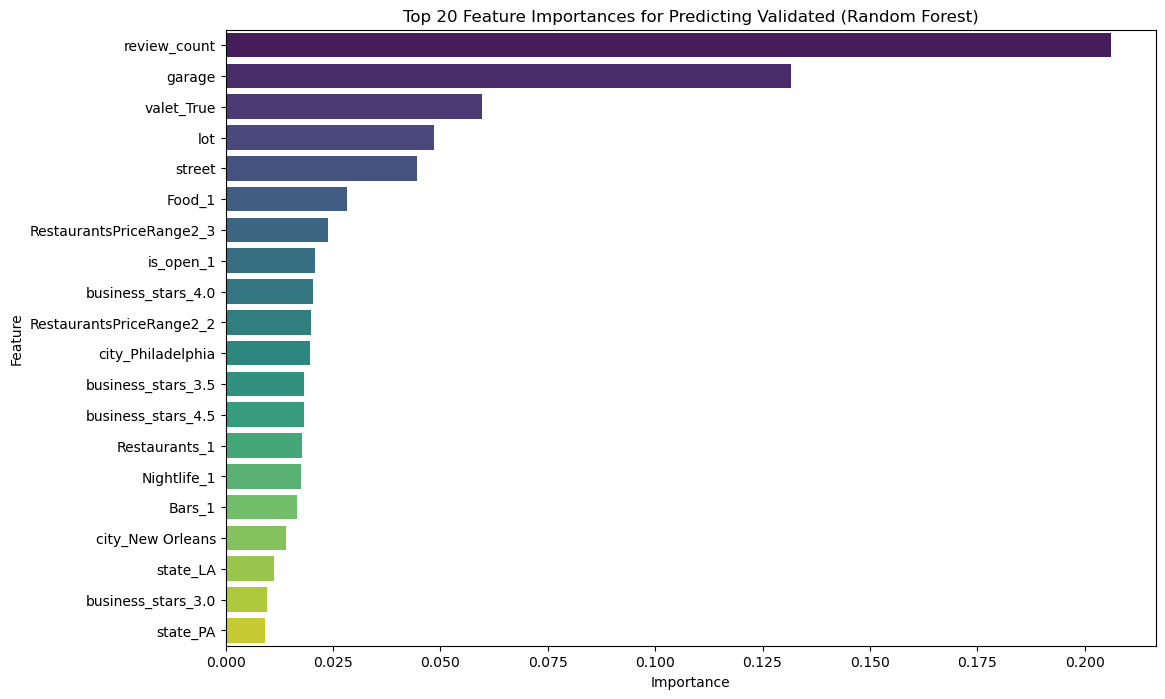

In [140]:
from sklearn.ensemble import RandomForestClassifier
y_train_binary = y_train.astype(int)

# Step 2: Train the Random Forest model
rf_model = RandomForestClassifier(n_estimators=100, random_state=42)
rf_model.fit(X_train_encoded_scaled, y_train_binary)  # Using the converted binary labels

# Step 3: Get feature importances
feature_importances = rf_model.feature_importances_

# Create a DataFrame for visualization
importance_df = pd.DataFrame({'Feature': X_train_encoded_scaled.columns, 'Importance': feature_importances})

# Step 4: Sort by importance and select the top 20 features
top_20_features = importance_df.sort_values(by='Importance', ascending=False).head(20)

# Step 5: Plot the top 20 feature importances
plt.figure(figsize=(12, 8))
sns.barplot(x='Importance', y='Feature', data=top_20_features, palette='viridis')
plt.title('Top 20 Feature Importances for Predicting Validated (Random Forest)')
plt.xlabel('Importance')
plt.ylabel('Feature')
plt.show()

currently keeeping all the features


In [169]:
columns_to_object = ['state','review_stars', 'business_stars']

# Define columns to convert to boolean
columns_to_boolean = ['BusinessAcceptsCreditCards', 'Automotive', 'is_open', 'Restaurants', 'Food',
                      'Shopping', 'Home Services', 'Beauty & Spas', 'Nightlife', 'Health & Medical', 
                      'Local Services', 'Bars', 'useful', 'funny', 'cool', 'valet']

# Convert specified columns to object
X_train[columns_to_object] = X_train[columns_to_object].astype(object)

# Convert specified columns to boolean
X_train[columns_to_boolean] = X_train[columns_to_boolean].astype(bool)

# Display the info of the dataframe
X_train.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 233170 entries, 0 to 233169
Data columns (total 24 columns):
 #   Column                      Non-Null Count   Dtype 
---  ------                      --------------   ----- 
 0   state                       233170 non-null  object
 1   review_count                233170 non-null  int64 
 2   is_open                     233170 non-null  bool  
 3   BusinessAcceptsCreditCards  233170 non-null  bool  
 4   RestaurantsPriceRange2      233170 non-null  object
 5   Restaurants                 233170 non-null  bool  
 6   Food                        233170 non-null  bool  
 7   Shopping                    233170 non-null  bool  
 8   Home Services               233170 non-null  bool  
 9   Beauty & Spas               233170 non-null  bool  
 10  Nightlife                   233170 non-null  bool  
 11  Health & Medical            233170 non-null  bool  
 12  Local Services              233170 non-null  bool  
 13  Bars                        2

In [170]:
X_test[columns_to_object] = X_test[columns_to_object].astype(object)

# Convert specified columns to boolean
X_test[columns_to_boolean] = X_test[columns_to_boolean].astype(bool)

# Display the info of the dataframe
X_test.info()

<class 'pandas.core.frame.DataFrame'>
Index: 58324 entries, 148398 to 224763
Data columns (total 24 columns):
 #   Column                      Non-Null Count  Dtype 
---  ------                      --------------  ----- 
 0   state                       58324 non-null  object
 1   review_count                58324 non-null  int64 
 2   is_open                     58324 non-null  bool  
 3   BusinessAcceptsCreditCards  58324 non-null  bool  
 4   RestaurantsPriceRange2      58324 non-null  object
 5   Restaurants                 58324 non-null  bool  
 6   Food                        58324 non-null  bool  
 7   Shopping                    58324 non-null  bool  
 8   Home Services               58324 non-null  bool  
 9   Beauty & Spas               58324 non-null  bool  
 10  Nightlife                   58324 non-null  bool  
 11  Health & Medical            58324 non-null  bool  
 12  Local Services              58324 non-null  bool  
 13  Bars                        58324 non-null  b

In [171]:
X_train.to_pickle('X_train.pkl')
X_test.to_pickle('X_test.pkl')

In [162]:
y_train_df = pd.DataFrame(y_train, columns=['validated'])
y_test_df = pd.DataFrame(y_test, columns=['validated'])

In [173]:
y_train_df.to_pickle('y_train.pkl')
y_test_df.to_pickle('y_test.pkl')

In [172]:
merged_data.to_csv('merged_data.csv', index=False)